In [1]:
import QUANTAXIS as QA

QUANTAXIS>> start QUANTAXIS
QUANTAXIS>> Welcome to QUANTAXIS, the Version is 1.1.3.dev3
QUANTAXIS>>  
 ```````````````````````````````````````````````````````````````````````````````````````````````````````````````````````` 
  ``########`````##````````##``````````##`````````####````````##```##########````````#``````##``````###```##`````######`` 
  `##``````## ```##````````##`````````####````````##`##```````##```````##```````````###``````##````##`````##```##`````##` 
  ##````````##```##````````##````````##`##````````##``##``````##```````##``````````####```````#```##``````##```##``````## 
  ##````````##```##````````##```````##```##```````##```##`````##```````##`````````##`##```````##`##```````##````##``````` 
  ##````````##```##````````##``````##`````##``````##````##````##```````##````````##``###```````###````````##`````##`````` 
  ##````````##```##````````##``````##``````##`````##`````##```##```````##```````##````##```````###````````##``````###```` 
  ##````````##```##````````##`````##`

In [2]:
if QA.__version__<'1.1.3.dev3':
    print('请升级QUANTAXIS')

In [26]:
index_all=QA.QA_fetch_index_list_adv()

In [28]:
index_all.to_csv('index.csv')

# 比较有影响力的指数



- 000001 上证指数
- 000002 a股指数 剔除
- 000006 地产指数
- 000009 上证380 剔除
- 000010 上证180 剔除
- 000016 上证50
- 000043 超大盘
- 000807 食品饮料
- 000025 180基建
- 000050 50等权 剔除
- 000934 中证金融

- 399355 长三角
- 399356 珠三角
- 399991 一带一路
- 399995 基建工程
- 399975 证券公司
- 399006 创业板指
- 399101 中小板综
- 399978 医药100
- 399989 中证医药

- 880490 通信设备
- 880916 国产软件
- 880506 5G
- 880230 海南
- 880202 新疆


In [213]:
# index_list=['000001','000006','000043','000016',
#             '000025','000807','399991',
#             '399355','399356',
#             '399995','399989','399975','399006',
#             '399101','399978',
#             '880916','880490','880506','880230','880202']

In [276]:
# 通信/软件/基建/医药/银行 板块轮动


index_list=['880490','880916','000025','000807','399989','000934','000001','880230','880911','880202']

In [277]:
index_all.loc[index_list].name

code
880490     通信设备
880916     国产软件
000025    180基建
000807     食品饮料
399989     中证医疗
000934     中证金融
000001     上证指数
880230     海南板块
880911     雄安新区
880202     新疆板块
Name: name, dtype: object

In [6]:
#QA.QA_fetch_get_index_day('tdx','880916','2018-08-01','2018-08-30')

In [108]:
#QA.QA_fetch_index_day('000001','2018-08-01','2018-08-30','pd')

In [279]:
data=QA.QA_fetch_index_day_adv(index_list,'2018-02-01','2018-08-30')


In [226]:
data=QA.QA_fetch_index_min_adv(index_list,'2018-08-01','2018-08-30','5min')

In [227]:
data.price.groupby(level=1).apply(lambda x:(x/x[0])).groupby(level=1).std().sort_values()

code
000001    0.014023
000934    0.016084
399995    0.020410
399989    0.025909
880490    0.027538
880916    0.034864
Name: price, dtype: float64

In [228]:
index_all.loc[data.price.groupby(level=1).apply(lambda x:(x/x[0])).groupby(level=1).std().sort_values().index].name

code
000001    上证指数
000934    中证金融
399995    基建工程
399989    中证医疗
880490    通信设备
880916    国产软件
Name: name, dtype: object

In [8]:
#QA.QA_fetch_index_day_adv('000001','2018-08-01','2018-08-30').plot('000001')

In [229]:
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [183]:
def format_date(x, pos=None):
    # 保证下标不越界,很重要,越界会导致最终plot坐标轴label无显示
    thisind = np.clip(int(x+0.5), 0, 1056-1)
    # print(thisind)
    return r.index[thisind].strftime('%Y-%m-%d %H:%M')

In [287]:
# fig = plt.figure(figsize=(16,14))
# ax = fig.add_subplot(1, 1, 1)
# data.price.reset_index(1).groupby('code').price.apply(lambda x:(x/x[0]).plot())
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))

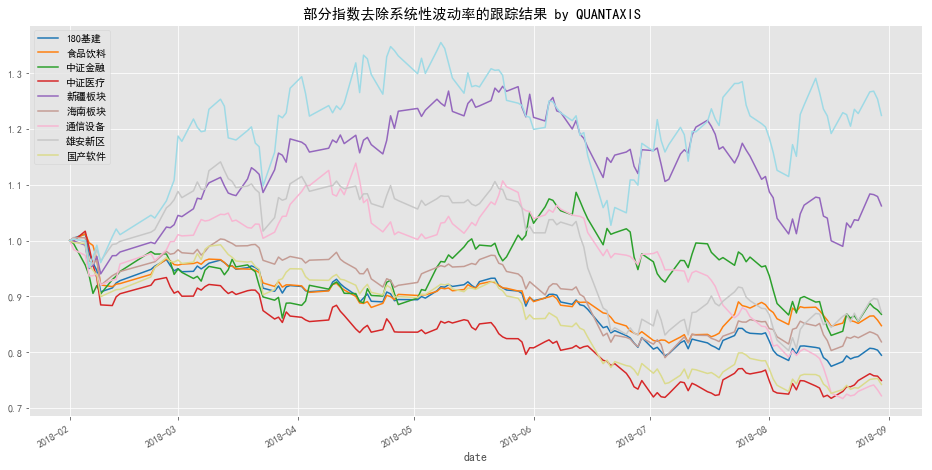

In [286]:
from matplotlib import cm
import numpy as np
import matplotlib.ticker as ticker
r=data.pivot('close')
import matplotlib.pyplot as plt
plt.style.use('ggplot')


#data.price.reset_index(1).groupby('code').price.apply(lambda x:(x/x[0]).plot())
#data.price.groupby(level=1).apply(lambda x:(x.pct_change()).plot())

#fig = plt.figure(figsize=(14, 12))
#ax = fig.add_subplot(1, 1, 1)
(r/r.iloc[0]).plot(figsize=(16,8),colormap='tab20')
#(r/r.iloc[0]).T.apply(lambda x:x/x.iloc[0]).T.drop('000001',axis=1).plot(figsize=(16,8),colormap='tab20')
#plt.figure(figsize=(16,8))
plt.title('部分指数去除系统性波动率的跟踪结果 by QUANTAXIS ')
plt.legend(index_all.loc[r.drop('000001',axis=1).columns].name)
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
plt.show()

In [283]:
(r/r.iloc[0]).T.apply(lambda x:x/x.iloc[0])

date,2018-02-01 00:00:00,2018-02-02 00:00:00,2018-02-05 00:00:00,2018-02-06 00:00:00,2018-02-07 00:00:00,2018-02-08 00:00:00,2018-02-09 00:00:00,2018-02-12 00:00:00,2018-02-13 00:00:00,2018-02-14 00:00:00,...,2018-08-17 00:00:00,2018-08-20 00:00:00,2018-08-21 00:00:00,2018-08-22 00:00:00,2018-08-23 00:00:00,2018-08-24 00:00:00,2018-08-27 00:00:00,2018-08-28 00:00:00,2018-08-29 00:00:00,2018-08-30 00:00:00
code,,,,,,,,,,,,,,,,,,,,,
000001,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
000025,1.0,0.998246,1.000272,1.018720,1.032496,1.020651,1.013671,1.002601,0.997710,0.994354,...,1.092939,1.088192,1.093893,1.087561,1.081138,1.075249,1.071580,1.073140,1.067101,1.066744
000807,1.0,0.990240,0.944978,0.958637,0.942891,0.971483,0.995904,1.016330,1.013288,1.017917,...,1.071695,1.069551,1.094982,1.093104,1.094274,1.080058,1.099925,1.091884,1.089650,1.092438
000934,1.0,0.995508,1.005106,1.010173,0.996084,0.986045,0.974210,0.965440,0.973061,0.974689,...,0.925879,0.931463,0.930182,0.936605,0.937286,0.945642,0.943403,0.939844,0.941841,0.942877
399989,1.0,0.994979,0.980301,0.971185,0.994950,1.026728,1.035600,1.063210,1.053170,1.055392,...,1.291044,1.264186,1.300832,1.299326,1.312528,1.308567,1.343344,1.343278,1.343206,1.337552
880202,1.0,1.001023,0.993395,0.985415,0.999304,1.019001,1.012971,1.023971,1.018352,1.017697,...,1.036648,1.035449,1.042186,1.047211,1.047834,1.042552,1.036583,1.034700,1.033360,1.030217
880230,1.0,0.979640,0.962191,0.957794,0.975877,0.993603,1.013565,1.015640,1.006834,1.032274,...,0.938026,0.915183,0.913317,0.915851,0.914605,0.921095,0.915637,0.919290,0.911340,0.908279
880490,1.0,0.999920,0.985589,0.974339,0.998695,1.040104,1.060839,1.085143,1.075906,1.076061,...,1.090479,1.103713,1.094911,1.084349,1.100303,1.080595,1.103809,1.111766,1.113668,1.096695
880911,1.0,0.992148,0.982849,0.976499,0.986171,0.991107,0.990611,0.993288,0.986959,0.983084,...,0.937486,0.935896,0.933318,0.930744,0.931100,0.928478,0.930627,0.932892,0.936966,0.934006


In [205]:
index_all.loc[(r/r.iloc[0]).iloc[-1].sort_values(ascending=False).index].name.tolist()

['5G概念',
 '国产软件',
 '通信设备',
 '珠三角',
 '上证50',
 '超大盘',
 '一带一路',
 '地产指数',
 '新疆板块',
 '中证医疗',
 '上证指数',
 '180基建',
 '证券公司',
 '长三角',
 '医药100',
 '中小板综',
 '创业板指',
 '基建工程',
 '食品饮料',
 '海南板块']

In [206]:
QA.QA_fetch_get_stock_realtime('tdx','000001')

,datetime,active1,active2,last_close,code,open,high,low,price,cur_vol,...,bid3,bid_vol3,ask4,ask_vol4,bid4,bid_vol4,ask5,ask_vol5,bid5,bid_vol5
code,,,,,,,,,,,,,,,,,,,,,
000001,2018-08-31 15:03:50.270881,4447,4447,10.12,000001,10.13,10.32,10.1,10.13,32366,...,10.1,8800,10.16,1065,10.09,1941,10.17,1857,10.08,4065


In [14]:
#QA.QA_fetch_get_index_day('tdx','880916','2018-08-01','2018-08-30')

In [201]:
QA.QA_fetch_get_stock_transaction_realtime('tdx','603733').query('num==1')

d:\quantaxis\QUANTAXIS\QAFetch\QATdx.py:812: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  _select_market_code(str(code)), code, (2 - i) * 2000, 2000)) for i in range(3)], axis=0)


,buyorsell,num,price,time,vol,date,datetime,code,order
datetime,,,,,,,,,
2018-08-31 09:30:00,1.0,1.0,22.08,09:30,1.0,2018-08-31,2018-08-31 09:30:00,603733,3
2018-08-31 09:30:00,1.0,1.0,22.08,09:30,3.0,2018-08-31,2018-08-31 09:30:00,603733,5
2018-08-31 09:30:00,1.0,1.0,22.08,09:30,2.0,2018-08-31,2018-08-31 09:30:00,603733,12
2018-08-31 09:31:00,1.0,1.0,22.08,09:31,10.0,2018-08-31,2018-08-31 09:31:00,603733,14
2018-08-31 09:31:00,0.0,1.0,22.10,09:31,1.0,2018-08-31,2018-08-31 09:31:00,603733,16
2018-08-31 09:31:00,0.0,1.0,22.10,09:31,1.0,2018-08-31,2018-08-31 09:31:00,603733,17
2018-08-31 09:31:00,1.0,1.0,22.08,09:31,8.0,2018-08-31,2018-08-31 09:31:00,603733,18
2018-08-31 09:31:00,1.0,1.0,22.10,09:31,6.0,2018-08-31,2018-08-31 09:31:00,603733,20
2018-08-31 09:31:00,1.0,1.0,22.09,09:31,5.0,2018-08-31,2018-08-31 09:31:00,603733,23


In [197]:
#data=QA.QA_fetch_stock_day_adv('000001')